# Dataset: Data Exploration and Preprocessing
Warren Purcell

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import time
from scipy.stats import randint
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, f1_score, explained_variance_score, max_error, mean_absolute_error, classification_report, plot_confusion_matrix
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

## Credit-Approval Data Set

load data

In [10]:
parentDirectory = os.path.abspath('../../')
CA_path = os.path.join(parentDirectory, 'data/Credit/dataset_29_credit-a.csv')
credit = pd.read_csv(CA_path)


In [11]:
credit.head()


A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15 class
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  00202    0     +
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g  00043  560     +
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  00280  824     +
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  00100    3     +
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  00120    0     +

array([[<AxesSubplot:title={'center':'A3'}>,
        <AxesSubplot:title={'center':'A8'}>],
       [<AxesSubplot:title={'center':'A11'}>,
        <AxesSubplot:title={'center':'A15'}>]], dtype=object)

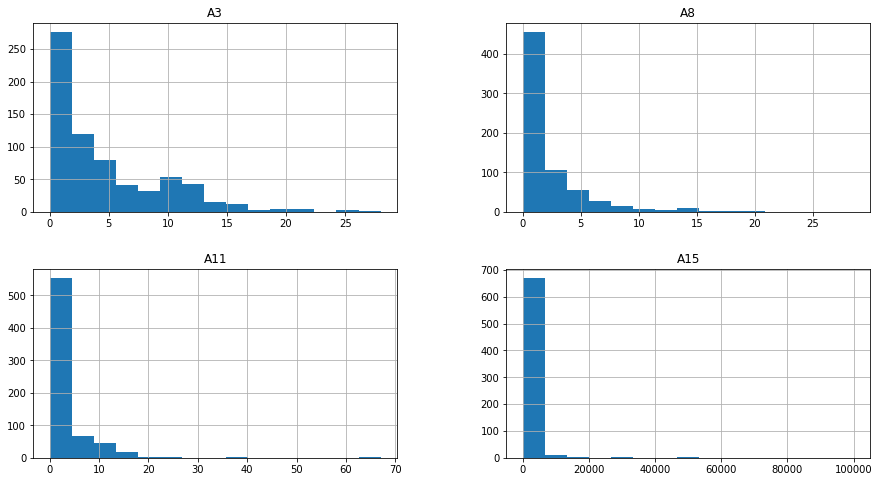

In [12]:
credit.describe()
credit.describe(exclude=np.number)
credit.hist(bins=15, figsize=(15, 8))

In [13]:
credit.replace('?', np.NaN, inplace=True)
credit_miss_val = credit.isna().sum()
mis_rows = credit.isna().any(axis=1).sum()
print("Number of missing rows: {}, which is {}% of rows".format(mis_rows, 100*mis_rows/credit.shape[0]))
                                                        
print(f"Number of missing values for credit:\n",credit_miss_val)

Number of missing rows: 37, which is 5.36231884057971% of rows
Number of missing values for credit:
 A1       12
A2       12
A3        0
A4        6
A5        6
A6        9
A7        9
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14      13
A15       0
class     0
dtype: int64


Change A14 from string to int

In [14]:
credit[credit.isna().any(axis=1)]

A1     A2      A3   A4   A5   A6   A7      A8 A9 A10  A11 A12 A13  \
71     b  34.83   4.000    u    g    d   bb  12.500  t   f    0   t   g   
83     a    NaN   3.500    u    g    d    v   3.000  t   f    0   t   g   
86     b    NaN   0.375    u    g    d    v   0.875  t   f    0   t   s   
92     b    NaN   5.000    y    p   aa    v   8.500  t   f    0   f   g   
97     b    NaN   0.500    u    g    c   bb   0.835  t   f    0   t   s   
202    b  24.83   2.750    u    g    c    v   2.250  t   t    6   f   g   
206    a  71.58   0.000  NaN  NaN  NaN  NaN   0.000  f   f    0   f   p   
243    a  18.75   7.500    u    g    q    v   2.710  t   t    5   f   g   
248  NaN  24.50  12.750    u    g    c   bb   4.750  t   t    2   f   g   
254    b    NaN   0.625    u    g    k    v   0.250  f   f    0   f   g   
270    b  37.58   0.000  NaN  NaN  NaN  NaN   0.000  f   f    0   f   p   
278    b  24.58  13.500    y    p   ff   ff   0.000  f   f    0   f   g   
286    a    NaN   1.500    u    g   ff   ff   0.000  f   t    2   t   g   
327  NaN  40.83   3.500    u    g    i   bb   0.500  f   f    0   f   s   
329    b    NaN   4.000    y    p    i    v   0.085  f   f    0   t   g   
330    b  20.42   0.000  NaN  NaN  NaN  NaN   0.000  f   f    0   f   p   
346  NaN  32.25   1.500    u    g    c    v   0.250  f   f    0   t   g   
374  NaN  28.17   0.585    u    g   aa    v   0.040  f   f    0   f   g   
406    a  40.33   8.125    y    p    k    v   0.165  f   t    2   f   g   
445    a    NaN  11.250    u    g   ff   ff   0.000  f   f    0   f   g   
450    b    NaN   3.000    y    p    i   bb   7.000  f   f    0   f   g   
453  NaN  29.75   0.665    u    g    w    v   0.250  f   f    0   t   g   
456    b  34.58   0.000  NaN  NaN  NaN  NaN   0.000  f   f    0   f   p   
479  NaN  26.50   2.710    y    p  NaN  NaN   0.085  f   f    0   f   s   
489  NaN  45.33   1.000    u    g    q    v   0.125  f   f    0   t   g   
500    b    NaN   4.000    u    g    x    v   5.000  t   t    3   t   g   
515    b    NaN  10.500    u    g    x    v   6.500  t   f    0   f   g   
520  NaN  20.42   7.500    u    g    k    v   1.500  t   t    1   f   g   
539    b  80.25   5.500    u    g  NaN  NaN   0.540  t   f    0   f   g   
592    b  23.17   0.000  NaN  NaN  NaN  NaN   0.000  f   f    0   f   p   
598  NaN  20.08   0.125    u    g    q    v   1.000  f   t    1   f   g   
601  NaN  42.25   1.750    y    p  NaN  NaN   0.000  f   f    0   t   g   
608    b    NaN   0.040    y    p    d    v   4.250  f   f    0   t   g   
622    a  25.58   0.000  NaN  NaN  NaN  NaN   0.000  f   f    0   f   p   
626    b  22.00   7.835    y    p    i   bb   0.165  f   f    0   t   g   
641  NaN  33.17   2.250    y    p   cc    v   3.500  f   f    0   t   g   
673  NaN  29.50   2.000    y    p    e    h   2.000  f   f    0   f   g   

       A14    A15 class  
71     NaN      0     -  
83   00300      0     -  
86   00928      0     -  
92   00000      0     -  
97   00320      0     -  
202    NaN    600     +  
206    NaN      0     +  
243    NaN  26726     +  
248  00073    444     +  
254  00380   2010     -  
270    NaN      0     +  
278    NaN      0     -  
286  00200    105     -  
327  01160      0     -  
329  00411      0     -  
330    NaN      0     -  
346  00372    122     -  
374  00260   1004     -  
406    NaN     18     -  
445    NaN   5200     -  
450  00000      1     -  
453  00300      0     -  
456    NaN      0     -  
479  00080      0     -  
489  00263      0     -  
500  00290   2279     +  
515  00000      0     +  
520  00160    234     +  
539  00000    340     -  
592    NaN      0     +  
598  00240    768     +  
601  00150      1     -  
608  00460      0     -  
622    NaN      0     +  
626    NaN      0     -  
641  00200    141     -  
673  00256     17     -

In [15]:
#credit.A14 = credit[credit.notna().all(axis=1)]['A14']
noNA_ind = credit[credit['A14'].notna()]['A14'].index
credit.loc[noNA_ind,'A14'] = credit['A14'][noNA_ind].astype(int)

noNA_ind = credit[credit['A2'].notna()]['A2'].index
credit.loc[noNA_ind,'A2'] = credit['A2'][noNA_ind].astype(float)


Fill numerical values with mean and categorical with most frequent

In [16]:
fill_dic = credit.mean()
fill_dic['A11'] = fill_dic['A11'].astype(int)
fill_dic['A14'] = fill_dic['A14'].astype(int)
fill_dic['A15'] = fill_dic['A15'].astype(int)
credit = credit.fillna(fill_dic)
credit = credit.fillna(credit.mode().iloc[0])

/var/folders/xq/slnrrc9d5kv8f35_3ld54d0h0000gn/T/ipykernel_59866/3287548841.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fill_dic = credit.mean()


In [17]:
credit.isna().sum()

A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
A11      0
A12      0
A13      0
A14      0
A15      0
class    0
dtype: int64

One hot encode credit

In [18]:
dummies = pd.get_dummies(credit,columns=['A1','A4','A5','A6','A7','A9','A10','A12','A13']).drop('class',axis=1)
credit_encoded = pd.concat([credit, dummies], axis=1).drop(['A1','A4','A5','A6','A7','A9','A10','A12','A13'],axis=1)
credit_encoded['class'] = (credit_encoded['class'] == '+').astype(int)
credit_encoded

A2      A3    A8  A11    A14  A15  class     A2      A3    A8  ...  \
0    30.83   0.000  1.25    1  202.0    0      1  30.83   0.000  1.25  ...   
1    58.67   4.460  3.04    6   43.0  560      1  58.67   4.460  3.04  ...   
2    24.50   0.500  1.50    0  280.0  824      1  24.50   0.500  1.50  ...   
3    27.83   1.540  3.75    5  100.0    3      1  27.83   1.540  3.75  ...   
4    20.17   5.625  1.71    0  120.0    0      1  20.17   5.625  1.71  ...   
..     ...     ...   ...  ...    ...  ...    ...    ...     ...   ...  ...   
685  21.08  10.085  1.25    0  260.0    0      0  21.08  10.085  1.25  ...   
686  22.67   0.750  2.00    2  200.0  394      0  22.67   0.750  2.00  ...   
687  25.25  13.500  2.00    1  200.0    1      0  25.25  13.500  2.00  ...   
688  17.92   0.205  0.04    0  280.0  750      0  17.92   0.205  0.04  ...   
689  35.00   3.375  8.29    0    0.0    0      0  35.00   3.375  8.29  ...   

     A7_z  A9_f  A9_t  A10_f  A10_t  A12_f  A12_t  A13_g  A13_p  A13_s  
0       0     0     1      0      1      1      0      1      0      0  
1       0     0     1      0      1      1      0      1      0      0  
2       0     0     1      1      0      1      0      1      0      0  
3       0     0     1      0      1      0      1      1      0      0  
4       0     0     1      1      0      1      0      0      0      1  
..    ...   ...   ...    ...    ...    ...    ...    ...    ...    ...  
685     0     1     0      1      0      1      0      1      0      0  
686     0     1     0      0      1      0      1      1      0      0  
687     0     1     0      0      1      0      1      1      0      0  
688     0     1     0      1      0      1      0      1      0      0  
689     0     1     0      1      0      0      1      1      0      0  

[690 rows x 53 columns]

In [19]:
credit_encoded.shape

(690, 53)

In [20]:
cvp_sol = f'../../outputs/Credit/Credit_preprocessed.csv'
credit_encoded.to_csv(path_or_buf=cvp_sol, sep=',', na_rep='', float_format=None, columns=None, header=True, index=False, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)

# Credit Dataset: Classification Training

Split data

In [21]:
x,y = credit_encoded.drop('class',axis=1),credit_encoded['class']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=36)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:

#imp_mean = SimpleImputer(strategy='mean')
#x_train = imp_mean.fit_transform(x_train)
#x_train[x_train.isna().any(axis=1)]


plt.plot(range(1,iterations),MLP_scores_scaled_TF,"-",label='Scaled')

# Random Forest Classifier

Parameters

In [23]:
grid_dict = {
    'n_estimators' : range(10,25,2),
    'max_depth' : range(15,24),
    'max_features' : range(2,6)
}
forest = RandomForestClassifier()

RF_grid_search = GridSearchCV(estimator=forest,param_grid=grid_dict,cv=8, n_jobs=-1)
RF_grid_search.fit(x_train_scaled,y_train)
optimised_random_forest = RF_grid_search.best_estimator_
RF_best_params_TF = RF_grid_search.best_params_
print(RF_grid_search.best_score_)
print(RF_best_params_TF)

0.8858695652173912
{'max_depth': 16, 'max_features': 5, 'n_estimators': 14}


In [24]:
RF_y_pred=optimised_random_forest.predict(x_test_scaled)
print(classification_report(y_test, RF_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        75
           1       0.93      0.86      0.89        63

    accuracy                           0.91       138
   macro avg       0.91      0.90      0.90       138
weighted avg       0.91      0.91      0.91       138



/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


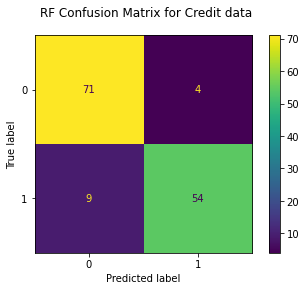

In [25]:
fig=plot_confusion_matrix(optimised_random_forest, x_test_scaled, y_test)
fig.figure_.suptitle("RF Confusion Matrix for Credit data")
plt.savefig('../../plots/Credit/RF_confusion_matrix')
plt.show()

## Multiple runs of RF

In [26]:
iterations = 20
RF_scores_normal_TF = []
RF_scores_scaled_TF = []
RF_training_time = []

for i in range(1,iterations):    
    model = RandomForestClassifier(**RF_best_params_TF)
    model.fit(x_train,y_train)
    score = model.score(x_test,y_test)
    RF_scores_normal_TF.append(score)
    
    model = RandomForestClassifier(**RF_best_params_TF)
    start = time.time()
    model.fit(x_train_scaled,y_train)
    end = time.time()
    RF_training_time.append((end - start))
    score = model.score(x_test_scaled,y_test)
    RF_scores_scaled_TF.append(score)

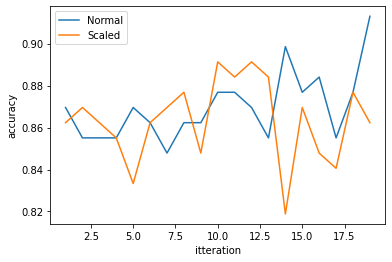

[0.8695652173913043, 0.8634630053394354]

In [27]:
plt.plot(range(1,iterations),RF_scores_normal_TF,"-",label='Normal')
plt.plot(range(1,iterations),RF_scores_scaled_TF,"-",label='Scaled')
plt.legend()
plt.xlabel('itteration')
plt.ylabel('accuracy')
plt.savefig('../../plots/Credit/RF_multiRun')
plt.show()
RF_avg_acc = [
#    sum(MLP_scores_normal)/len(MLP_scores_normal),
 #   sum(MLP_scores_scaled)/len(MLP_scores_scaled),
    sum(RF_scores_normal_TF)/len(RF_scores_normal_TF),
    sum(RF_scores_scaled_TF)/len(RF_scores_scaled_TF)
    ]

RF_avg_acc

# SVM Classifier

Parameter

In [28]:
SVM_parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [0.1, 0.15, 0.2, 0.25, 0.5, 1, 1.5, 2], "C": [1, 2]}
cv_inner = KFold(n_splits=5)
SVM_gridsearch_TF = GridSearchCV(SVC(), SVM_parameters, n_jobs=-1, cv=cv_inner)
SVM_gridsearch_TF.fit(x_train_scaled, y_train)
print(SVM_gridsearch_TF.best_params_)
print(SVM_gridsearch_TF.best_score_)
optimised_SVM = SVM_gridsearch_TF.best_estimator_
SVM_best_params_TF = SVM_gridsearch_TF.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
0.8442260442260441


In [29]:
SVM_y_pred=optimised_SVM.predict(x_test_scaled)
print(classification_report(y_test, SVM_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        75
           1       0.77      0.89      0.82        63

    accuracy                           0.83       138
   macro avg       0.83      0.83      0.83       138
weighted avg       0.84      0.83      0.83       138



/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


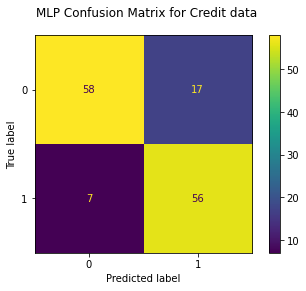

In [30]:
fig=plot_confusion_matrix(optimised_SVM, x_test_scaled, y_test)
fig.figure_.suptitle("MLP Confusion Matrix for Credit data")
plt.savefig('../../plots/Credit/SVM_confusion_matrix')
plt.show()

In [31]:
iterations = 20
SVM_scores_normal_TF = []
SVM_scores_scaled_TF = []
SVM_training_time = []

for i in range(1,iterations):    
  
    model = SVC(**SVM_best_params_TF)
    start = time.time()
    model.fit(x_train_scaled,y_train)
    end = time.time()
    SVM_training_time.append((end - start))
    score = model.score(x_test_scaled,y_test)
    SVM_scores_scaled_TF.append(score)

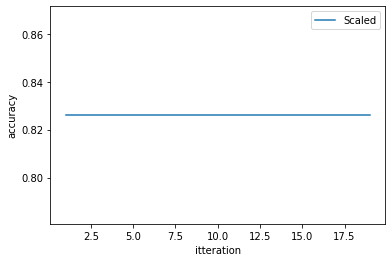

[0.8260869565217387]

In [32]:
#plt.plot(range(1,iterations),SVM_scores_normal_TF,"-",label='Normal')
plt.plot(range(1,iterations),SVM_scores_scaled_TF,"-",label='Scaled')
plt.legend()
plt.xlabel('itteration')
plt.ylabel('accuracy')
plt.savefig('../../plots/Credit/SVM_multiRun')
plt.show()
SVM_avg_acc = [
#    sum(MLP_scores_normal)/len(MLP_scores_normal),
 #   sum(MLP_scores_scaled)/len(MLP_scores_scaled),
    #sum(SVM_scores_normal_TF)/len(SVM_scores_normal_TF),
    sum(SVM_scores_scaled_TF)/len(SVM_scores_scaled_TF)
    ]

SVM_avg_acc

# MLP Classifier

In [33]:
parameters = {'max_iter': [1700, 1800, 1900, 2000], 'hidden_layer_sizes': [(48,), (50,), (50, 60),(50, 50), (50, 55), (50, 45)], "activation": ['relu'], "solver": ["sgd", "lbfgs"], "random_state": [0]} 
cv_inner = KFold(n_splits=5)
MLP_gridsearch_TF = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, cv=cv_inner)
MLP_gridsearch_TF.fit(x_train_scaled, y_train)
print(MLP_gridsearch_TF.best_params_)
print(MLP_gridsearch_TF.best_score_)
optimised_MLP = MLP_gridsearch_TF.best_estimator_
MLP_best_params_TF = MLP_gridsearch_TF.best_params_

{'activation': 'relu', 'hidden_layer_sizes': (50, 60), 'max_iter': 1700, 'random_state': 0, 'solver': 'sgd'}
0.8732186732186733


In [34]:
MLP_y_pred=optimised_MLP.predict(x_test_scaled)
print(classification_report(y_test, MLP_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89        75
           1       0.86      0.87      0.87        63

    accuracy                           0.88       138
   macro avg       0.88      0.88      0.88       138
weighted avg       0.88      0.88      0.88       138



/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


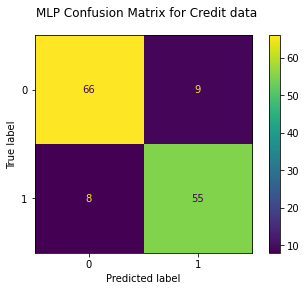

In [35]:
fig=plot_confusion_matrix(optimised_MLP, x_test_scaled, y_test)
fig.figure_.suptitle("MLP Confusion Matrix for Credit data")
plt.savefig('../../plots/Credit/MLP_confusion_matrix')
plt.show()

## Multiple runs of MLP

In [36]:
iterations = 20
MLP_scores_normal_TF = []
MLP_scores_scaled_TF = []
MLP_trainig_time = []

for i in range(1,iterations):    
    model = MLPClassifier(**MLP_best_params_TF)
    model.fit(x_train,y_train)
    score = model.score(x_test,y_test)
    MLP_scores_normal_TF.append(score)
    
    model = MLPClassifier(**MLP_best_params_TF)
    start = time.time()
    model.fit(x_train_scaled,y_train)
    end = time.time()
    MLP_trainig_time.append((end - start))
    score = model.score(x_test_scaled,y_test)
    MLP_scores_scaled_TF.append(score)

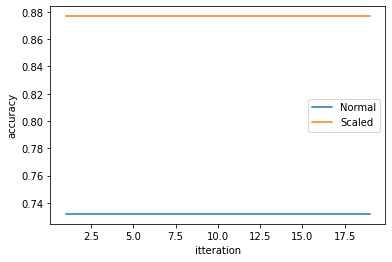

[0.7318840579710142, 0.8768115942028987]

In [37]:
plt.plot(range(1,iterations),MLP_scores_normal_TF,"-",label='Normal')
plt.plot(range(1,iterations),MLP_scores_scaled_TF,"-",label='Scaled')
plt.legend()
plt.xlabel('itteration')
plt.ylabel('accuracy')
plt.savefig('../../plots/Credit/MLP_multiRun')
plt.show()
MLP_avg_acc = [
#    sum(MLP_scores_normal)/len(MLP_scores_normal),
 #   sum(MLP_scores_scaled)/len(MLP_scores_scaled),
    sum(MLP_scores_normal_TF)/len(MLP_scores_normal_TF),
    sum(MLP_scores_scaled_TF)/len(MLP_scores_scaled_TF)
    ]

MLP_avg_acc

### Cross validation

Avg accuracy forest: 0.8347826086956521
Avg accuracy MLP: 0.8159420289855073
Avg accuracy SVM: 0.8202898550724637


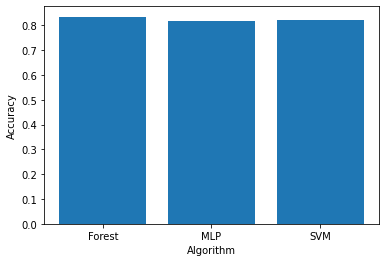

In [38]:
scale2 = StandardScaler()
x_scaled = scale2.fit_transform(x)

k = 5
kf = KFold(n_splits=k)
forest = RandomForestClassifier(**RF_best_params_TF)
mlp = MLPClassifier(**MLP_best_params_TF)
svm = SVC(**SVM_best_params_TF)
names = ["Forest", "MLP", "SVM"]

result_forest = cross_val_score(forest, x_scaled, y, cv = kf)
result_MLP = cross_val_score(mlp, x_scaled, y, cv=kf)
result_SVM = cross_val_score(svm, x_scaled, y, cv=kf)
print("Avg accuracy forest: {}".format(result_forest.mean()))
print("Avg accuracy MLP: {}".format(result_MLP.mean()))
print("Avg accuracy SVM: {}".format(result_SVM.mean()))
results = [result_forest.mean(), result_MLP.mean(), result_SVM.mean()]
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.bar(names, results)
plt.savefig('../../plots/Credit/Cross_val_scaledInput')
plt.show()

## Average raining times

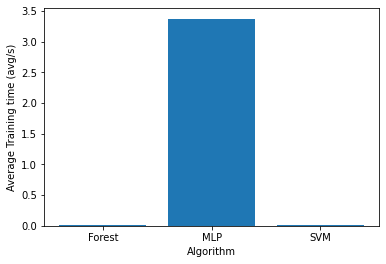

[0.01811528205871582, 3.376450864892257, 0.019769279580367238]


In [39]:
RF_Avg_training = (sum(RF_training_time)/len(RF_training_time))
MLP_Avg_training = (sum(MLP_trainig_time)/len(MLP_trainig_time))
SVM_Avg_training = (sum(SVM_training_time)/len(SVM_training_time)) 
names = ["Forest", "MLP", "SVM"]

results = [RF_Avg_training, MLP_Avg_training, SVM_Avg_training]
plt.xlabel('Algorithm')
plt.ylabel('Average Training time (avg/s)')
plt.bar(names, results)
plt.savefig('../../plots/Credit/Average_Training_time')
plt.show()
print([RF_Avg_training, MLP_Avg_training, SVM_Avg_training])

## Hold-out Accuracy

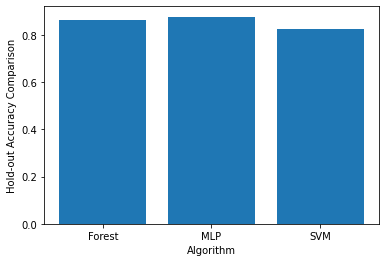

[0.8634630053394354, 0.8768115942028987, 0.8260869565217387]


In [40]:
RF_hold_out_avg = (sum(RF_scores_scaled_TF)/len(RF_scores_scaled_TF))
MLP_hold_out_avg = (sum(MLP_scores_scaled_TF)/len(MLP_scores_scaled_TF))
SVM_hold_out_avg = (sum(SVM_scores_scaled_TF)/len(SVM_scores_scaled_TF))
names = ["Forest", "MLP", "SVM"]

results = [RF_hold_out_avg, MLP_hold_out_avg, SVM_hold_out_avg]
plt.xlabel('Algorithm')
plt.ylabel('Hold-out Accuracy Comparison')
plt.bar(names, results)
plt.savefig('../../plots/Credit/Hold_out_Comparison')
plt.show()
print([RF_hold_out_avg, MLP_hold_out_avg, SVM_hold_out_avg])